<center> <h2> Pre-processing of cell images </h2> </center>

### 1. Set up and import functions

In [1]:
from preprocessing_utils import find_rotation,crop
from preprocessing_pipeline import preprocess
from image_utils import load_images_from_path,save_preprocessed_images,show_modification
import os


In [16]:
# Load images
PATH = "../../Data/220429_ MCF10A  laminAC fibro phallo pattern mars 2022 - Tif\*.tif"
image_paths, images = load_images_from_path(PATH)

In [17]:
#find rotation to align the image vertically
firstImage = images[0]
teta = find_rotation(firstImage)
print("the angle for rotation is ",teta)

the angle for rotation is  168.99999901102913


### 2. Step-by-step pipline pre-processing on a cropped image of size 400 x 400

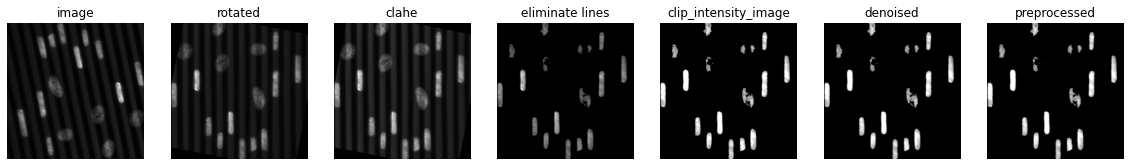

In [18]:
cropped_image = crop(images[0], 100, 500, 200, 600)
preprocessedImageCrop = preprocess(cropped_image,teta,aff=1)

In [19]:
# import matplotlib.pyplot as plt
# plt.imshow(preprocessedImageCrop)

### 3. Step-by-step pipeline pre-processing on a whole image

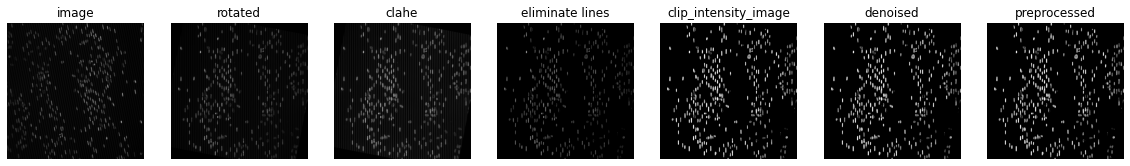

In [20]:
preprocessedImage = preprocess(images[0],teta,aff=1)

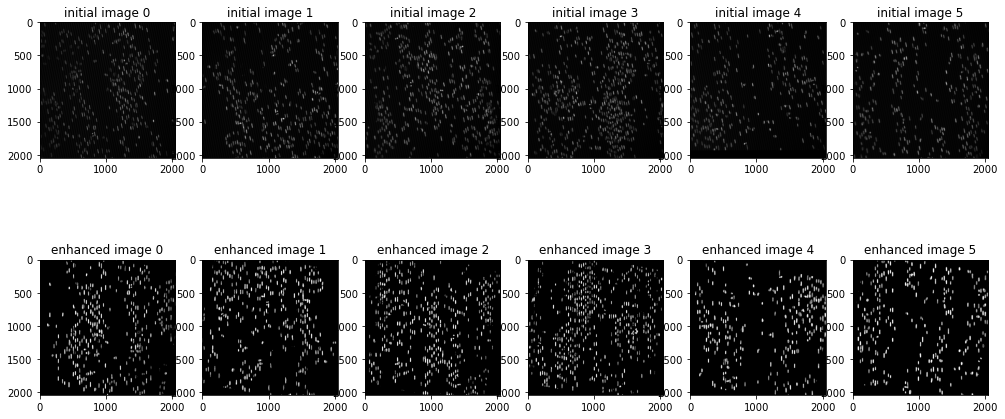

In [21]:
enhanced_images = [preprocess(image, teta) for image in images]

# #Show images before vs after
show_modification(images,enhanced_images,modification="enhanced")

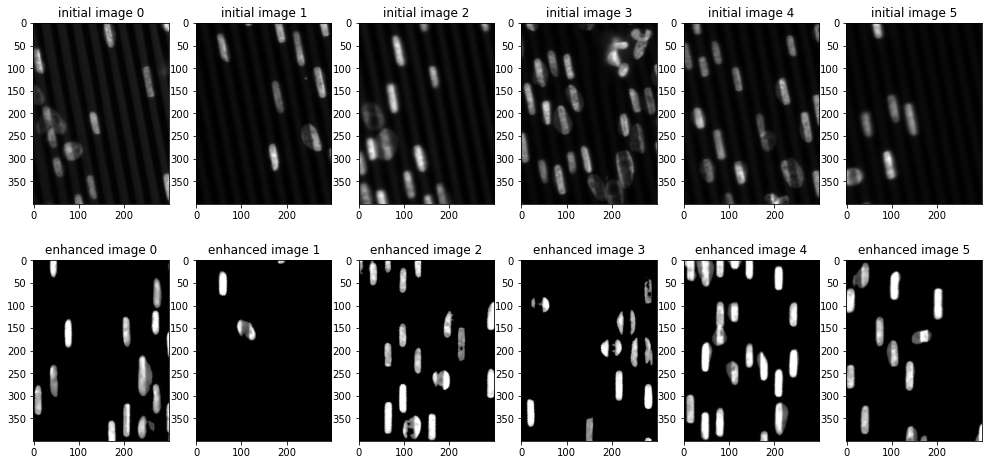

In [22]:
enhanced_images_cropped = [crop(image, 1000, 1400, 200, 500)  for image in enhanced_images]
images_cropped = [crop(image, 1000, 1400, 200, 500)  for image in images]

# #Show images before vs after
show_modification(images_cropped,enhanced_images_cropped,modification="enhanced")

### 4. Run the preprocessing on the whole dataSet and use crops for the visualization 

In [5]:
PATH_DATA = "../Data/"
data_folders = os.listdir(PATH_DATA)

 MCF10A  laminAC fibro phallo pattern mars 2022
168.99999901102913


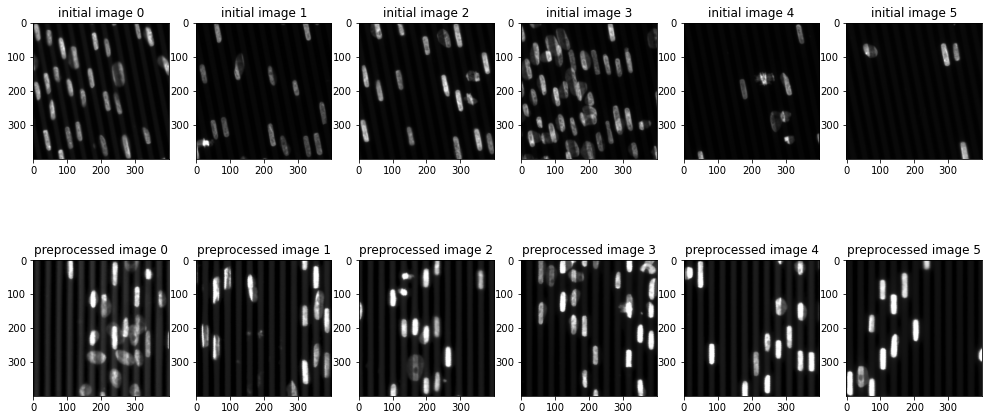

 MCF10A BRAF V600E laminAC fibro phallo pattern mars 2022
174.99999234780518


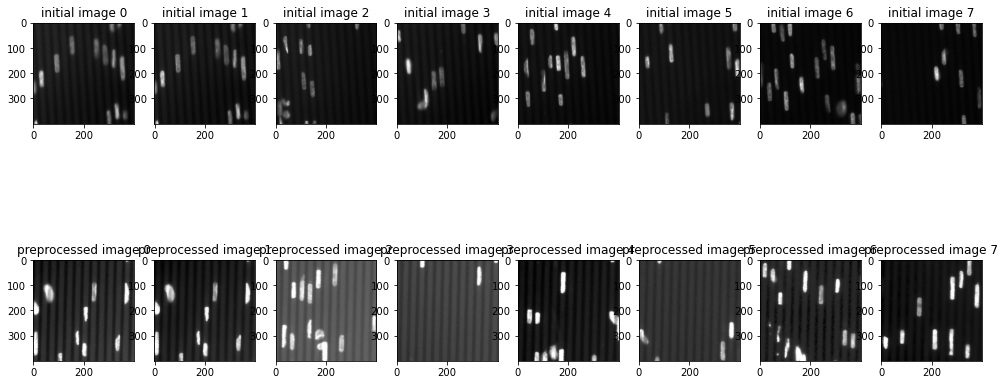

 MCF10A DCIS.com laminAC fibro phallo pattern mars 2022
176.00000034418676


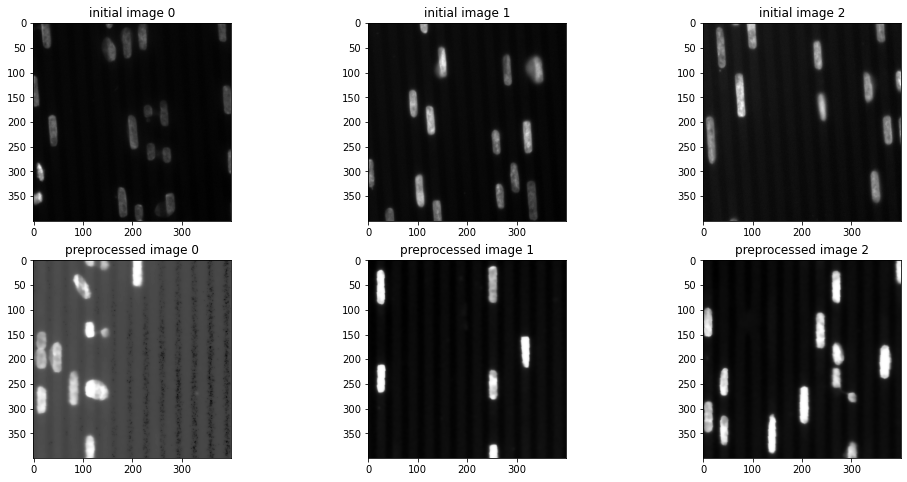

 MCF10A PIK3CA laminAC fibro phallo pattern mars 2022
157.99999301310194


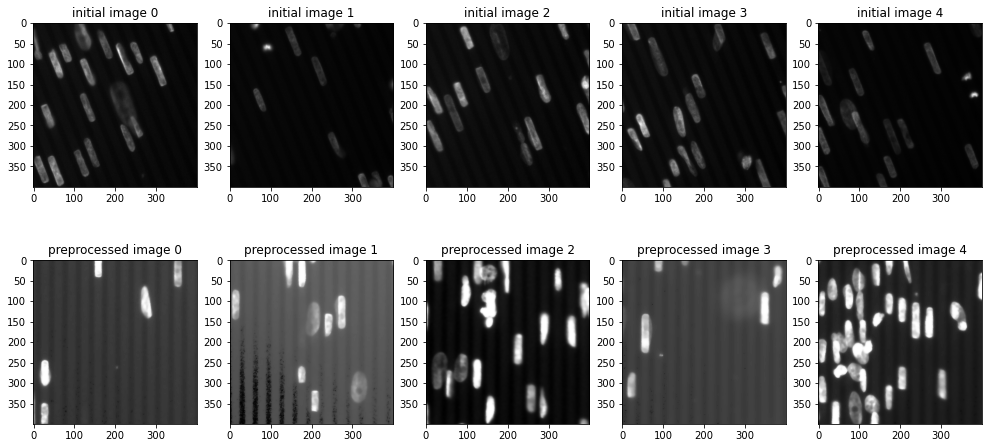

 MCF10A Rac1 laminAC fibro phallo pattern mars 2022
12.999999792575526


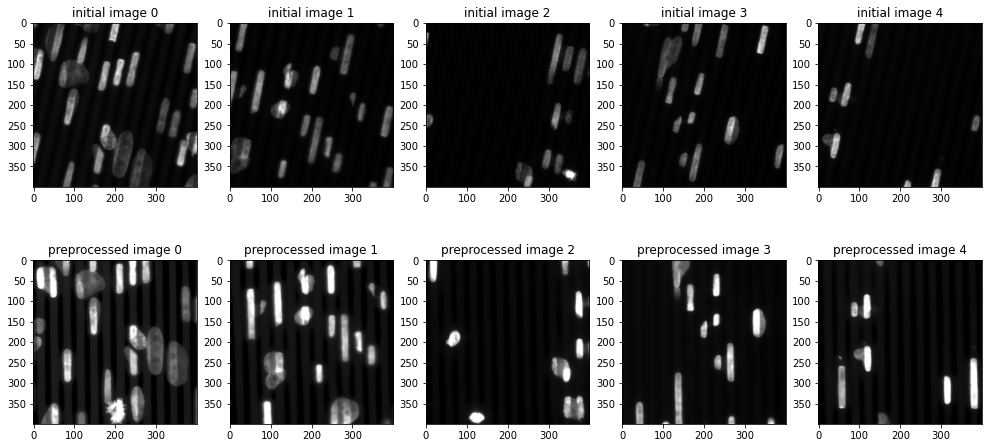

In [7]:
for folder in data_folders: 
    PATH = os.path.join(PATH_DATA, folder,'*.tif')
    print(PATH[15:-12])
    image_paths, images = load_images_from_path(PATH)
    firstImage = images[0]
    angle = find_rotation(firstImage)
    print(angle)
    preprocessedImageCrop = [preprocess(image,angle,aff=0) for image in images]
    cropped_images = [crop(image, 1100, 1500, 1200, 1600) for image in images]
    cropped_images_enhanced = [crop(image, 1100, 1500, 1200, 1600) for image in preprocessedImageCrop]
    show_modification(cropped_images,cropped_images_enhanced,"preprocessed")